### Step1: Importing the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as sm

### Step2: Data Inspection

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv')
print(data.head())

        Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2/17/2010               0.0           2043200.0             0.0   
1  2/18/2010               0.0           2054650.0             0.0   
2  2/19/2010               0.0           2063600.0             0.0   
3  2/20/2010               0.0           2074700.0             0.0   
4  2/21/2010               0.0           2085400.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000235   
1               0.0              0.0            0.000241   
2               0.0              0.0            0.000228   
3               0.0              0.0            0.000218   
4               0.0              0.0            0.000234   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                      0                           1.0   
1                      0                           1.0   
2                      0                    

#### What's the 1024th element in the column 'btc_market_price'.

In [4]:
print(data['btc_market_price'][1023])

13.6888


#### Checking correlation with 'btc_market_price'

E:\Anaconda 3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


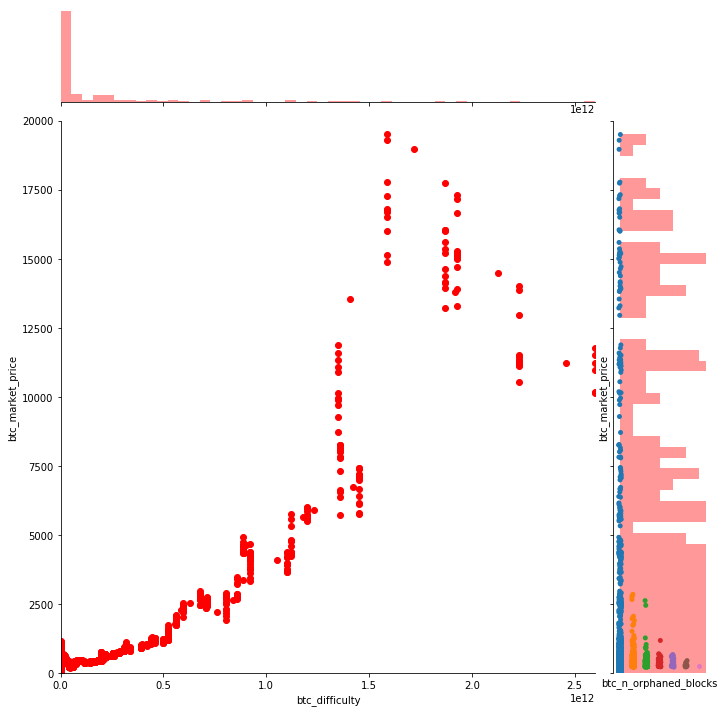

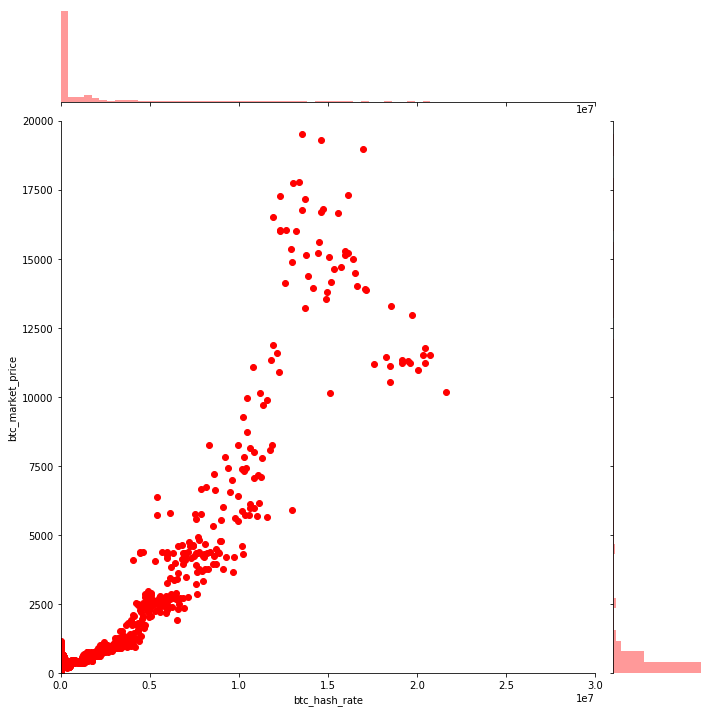

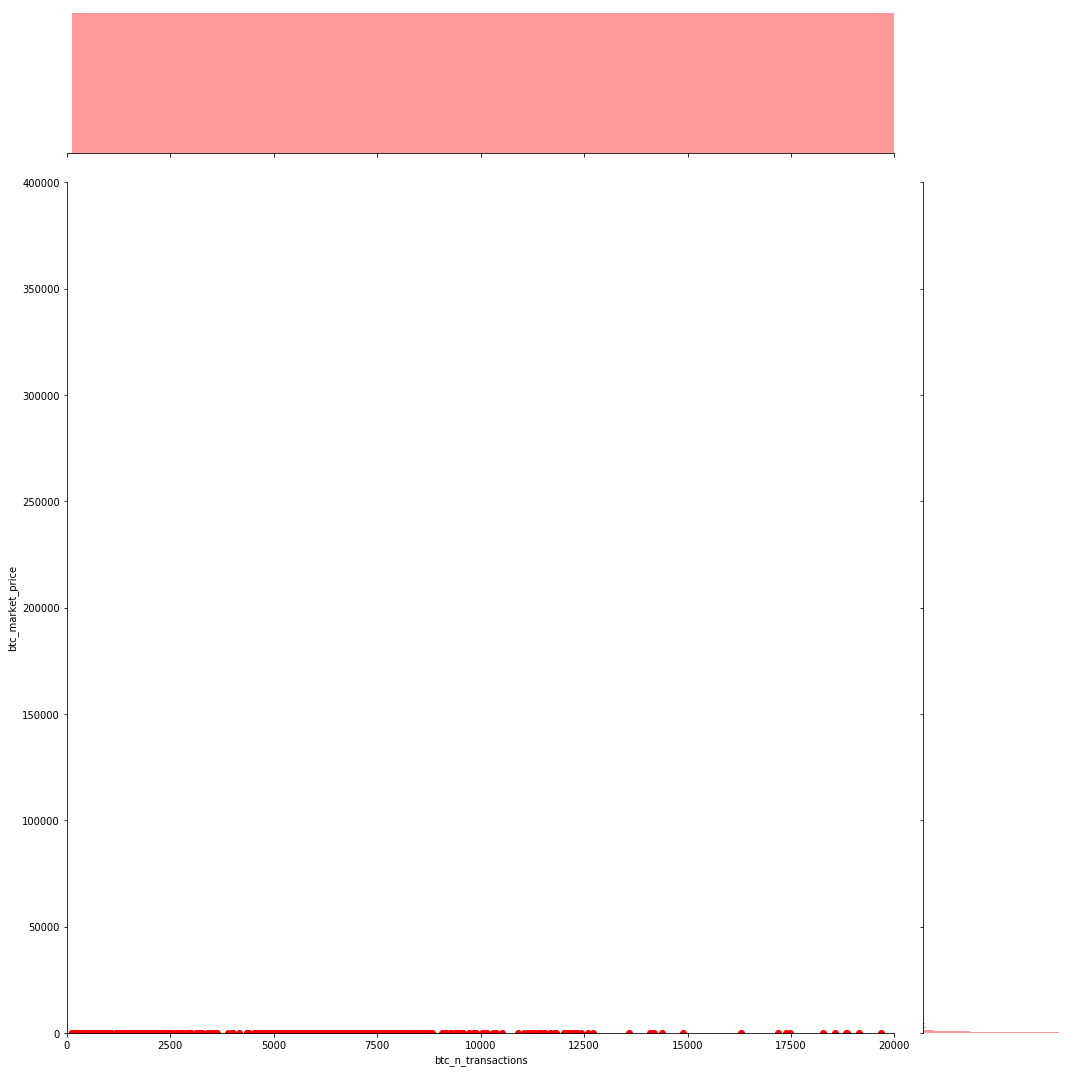

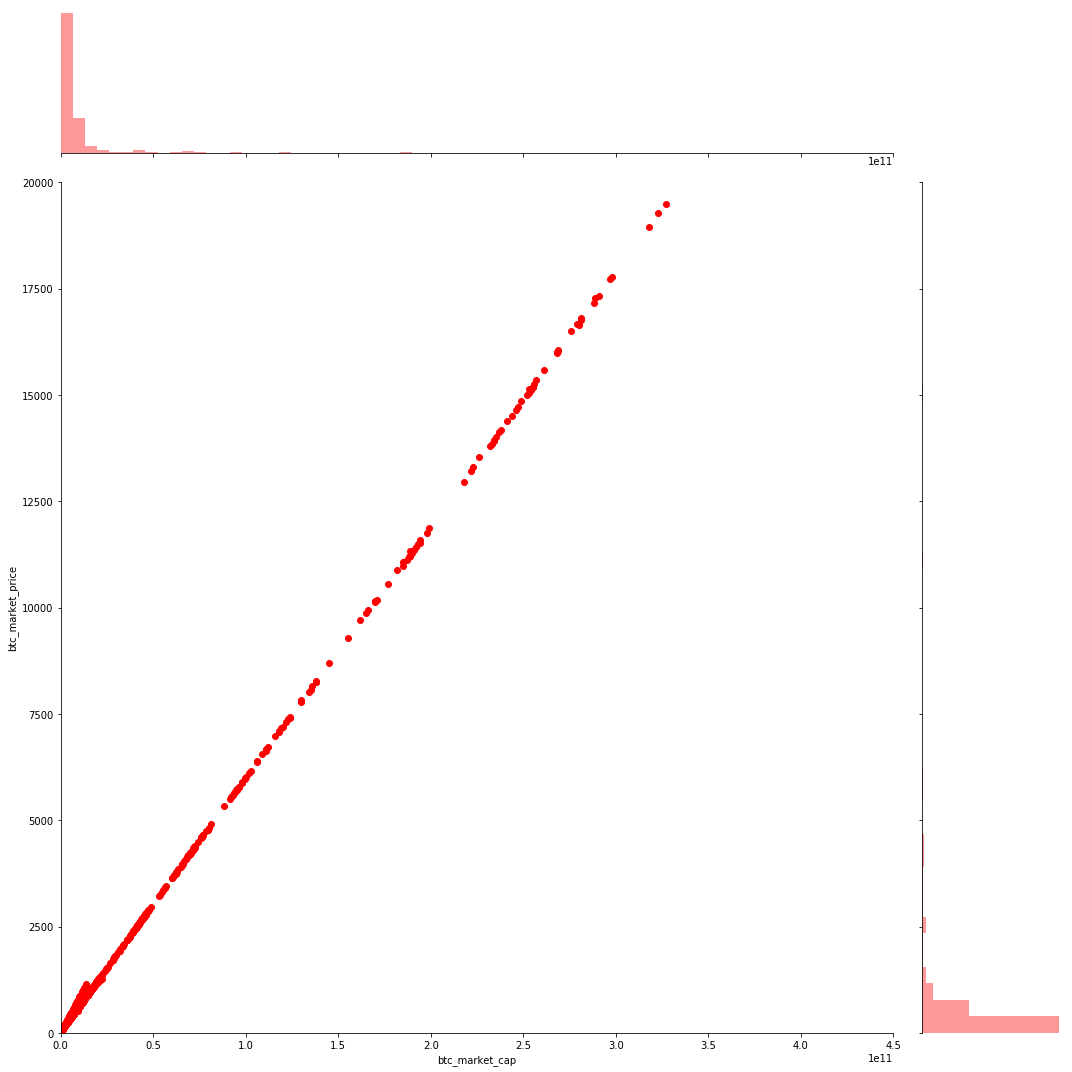

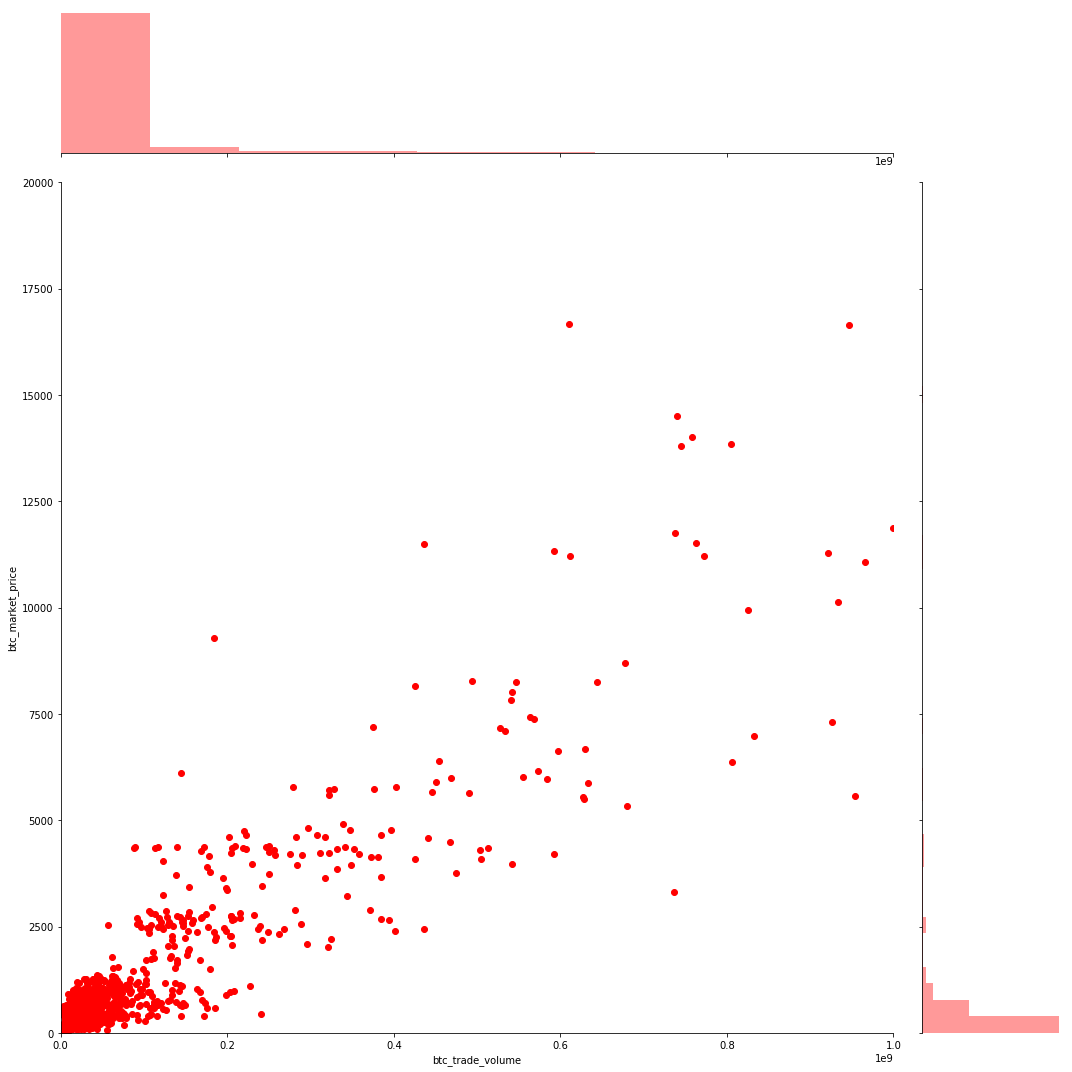

In [5]:
g = sns.jointplot( "btc_difficulty", "btc_market_price", data=data, xlim=(0, 2.6E+12), ylim=(0, 20000), color="r", size=10)
k = sns.stripplot(x="btc_n_orphaned_blocks",y="btc_market_price",data=data,jitter=True)
a = sns.jointplot( "btc_hash_rate", "btc_market_price", data=data, xlim=(0, 30000000), ylim=(0, 20000), color="r", size=10)
b = sns.jointplot("btc_n_transactions","btc_market_price", data=data, ylim=(0, 400000), xlim=(0, 20000), color="r", size=15)
c = sns.jointplot("btc_market_cap", "btc_market_price", data=data, xlim=(0, 450000000000), ylim=(0, 20000), color="r", size=15)
d = sns.jointplot("btc_trade_volume", "btc_market_price", data=data, xlim=(0, 1000000000), ylim=(0, 20000), color="r", size=15)

### Step3: Data Cleaning

In [6]:
print(data['btc_trade_volume'].isnull().values.any())

data['btc_trade_volume'].fillna(data['btc_trade_volume'].median(),inplace = True)
data['btc_transaction_fees'].fillna(data['btc_transaction_fees'].median(),inplace = True)
data['btc_difficulty'].fillna(data['btc_difficulty'].mean(),inplace = True)

True


In [7]:
data['btc_trade_volume'].isnull().values.any()

False

### Step4: Building Model

In [8]:
model = smf.ols(formula='btc_market_price ~ btc_market_cap + btc_n_transactions + btc_miners_revenue + btc_cost_per_transaction + btc_difficulty + btc_hash_rate + btc_cost_per_transaction_percent', data=data).fit()

In [9]:
y = model.predict(data[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

print("MSE:", sm.mean_squared_error(y, data['btc_market_price'].values))

MSE: 406.614329178385


### Step5: Validating model

In [10]:
test = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/test_set.csv')

test_predict = model.predict(test[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

for i in range(0,len(test_predict)):
    print("The price on "+ str(i+1) +" february is "+ str(test_predict[i]))

The price on 1 february is 9058.08823735933
The price on 2 february is 8899.085658393831
The price on 3 february is 9119.843047953007
The price on 4 february is 8466.687255802226
The price on 5 february is 6800.753792825481
The price on 6 february is 7625.499113950158
The price on 7 february is 8072.405387702957
The price on 8 february is 8259.810369270881
The price on 9 february is 8557.971719996618
The price on 10 february is 8334.0152536537
The price on 11 february is 8425.71224731751
The price on 12 february is 8836.588495893442
The price on 13 february is 8623.849963358467
The price on 14 february is 9363.41994875039
